In [154]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from astropy import table
from scipy.optimize import curve_fit
import random
from fonctions_maison import *

Importer les données

In [155]:
x_fond_d1, y_fond_d1 = np.loadtxt("Données/gauss_rouge_fond_D1_A.JPG", unpack = True)
x_fond_d2, y_fond_d2 = np.loadtxt("Données/gauss_rouge_fond_D2_A.JPG", unpack = True)
x_fond_d3, y_fond_d3 = np.loadtxt("Données/gauss_rouge_fond_D3_A.JPG", unpack = True)
x_fond_d4, y_fond_d4 = np.loadtxt("Données/gauss_rouge_fond_D4_A.JPG", unpack = True)
x_fond_d5, y_fond_d5 = np.loadtxt("Données/gauss_rouge_fond_D5_A.JPG", unpack = True)

x_array = ([x_fond_d1,x_fond_d2,x_fond_d3,x_fond_d4,x_fond_d5])
y_array = ([y_fond_d1,y_fond_d2,y_fond_d3,y_fond_d4,y_fond_d5])


In [156]:
def ouverture_num(x, y):
    
    pixel = 5.2e-6 #m
    D=np.array([0,1,2,3,4])*(1/8)*(25.4e-3)+5e-3 #Distance entre caméra et fibre optique
    
    R_optique=[]
    
    for i in range(len(D)):
        
        x_test = pixel*x[i] #Transforme du nombre de pixels en distance
        #Fit
        y_fit, p_opt, p_err = fit_gaussien(x_test, y[i], p0 = [0,100,0.001,0.0001], show = True)
        #plt.plot(x_test, y_fit)

        cinq_pourcent = find_max(y_fit)*0.05
        x_limite = x_test[find_nearest(y_fit,cinq_pourcent)]
        R_optique.append( np.abs( x_limite - p_opt[2] ) )
    
    
    y_fit, p_opt, p_err = reg_lin(D,R_optique, show = True)
    
    print(D)
    print(R_optique)
    
    return 
    

In [157]:
def V_th(x,y):
    
    pixel = 5.2e-6 #m
    x = pixel*x #Transforme du nombre de pixels en distance
    plt.plot(x,y)

    D=1e-2 #Distance entre caméra et fibre optique
    R=[1.75e-6, 2.2e-6, 1.8e-6] #Rayon des coeurs de fibre monomode
    lamda=[405e-9,515e-9,532e-9,632.8e-9,] #nm


    #Fit
    y_fit, p_opt, p_err = fit_gaussien(x, y, p0 = [0,100,0.001,0.0001], show = True)
    #plt.plot(x_test, y_fit)

    cinq_pourcent = find_max(y_fit)*0.05
    x_limite = x[find_nearest(y_fit,cinq_pourcent)]
    R_optique = x_limite - p_opt[2]
    
    #print(x_limite)

    na=np.arctan(np.abs(R_optique)/D)

    for laser in lamda:
        for coeur in R:
            k=2*np.pi/laser #nombre d'onde
            V=k*coeur*na #V
            print("Pour laser à {} nm et R = {}, V = {}".format(laser,coeur,V))
            
    return R_optique


H = 4.77021103520235 +/- 0.5125744400311272, A = 115.33789932675889 +/- 0.538677537954196, x0 = 0.000978570018372693 +/- 1.3696855309971086e-06, sigma = 0.00036888807743994925 +/- 2.5254801560336067e-06


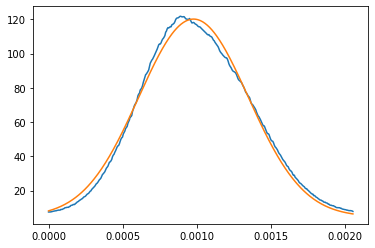

H = 5.013374700418815 +/- 0.3801193903826007, A = 99.96401954330886 +/- 0.42635319669677785, x0 = 0.0012072407973005815 +/- 1.5740469453722094e-06, sigma = 0.00042782227518025316 +/- 2.6772132454967802e-06


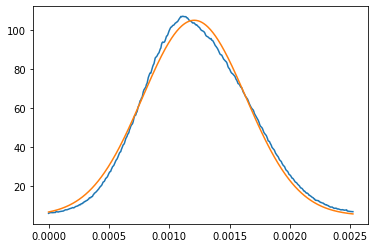

H = 6.200827491594864 +/- 0.8022030003068856, A = 88.62857148726292 +/- 0.7449339446235624, x0 = 0.0010724971551913307 +/- 2.1249680425612456e-06, sigma = 0.000474823023213582 +/- 5.374578398319777e-06


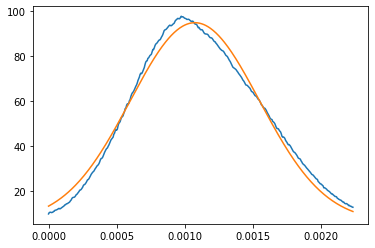

H = 3.103962537326271 +/- 0.6966013622087985, A = 109.76025508493052 +/- 0.6524804107073332, x0 = 0.0013786919446561873 +/- 1.9340135862283876e-06, sigma = 0.0005657521498886075 +/- 4.6501671112155095e-06


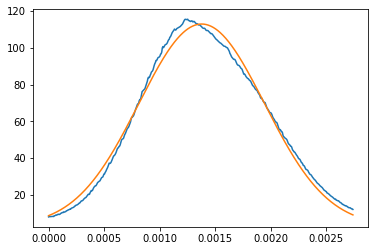

H = 4.098929155313067 +/- 0.7428888988952563, A = 114.63769673184808 +/- 0.7152573446743601, x0 = 0.001640102499120603 +/- 2.4684978235582015e-06, sigma = 0.0006162195983195354 +/- 5.410826901640486e-06


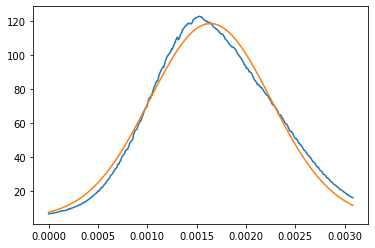

a = 0.03758355220512849 +/- 0.012766990841481982 et b = 0.0008868839773429653 +/- 0.0001558324872990675


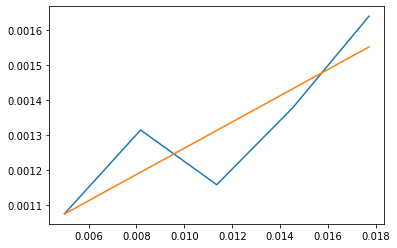

[0.005    0.008175 0.01135  0.014525 0.0177  ]
[0.0010754299816273074, 0.0013147592026994184, 0.0011583028448086696, 0.0013786919446561873, 0.001640102499120603]


In [158]:
#na = V_th(x_array,y_array)

ouverture = ouverture_num(x_array, y_array)


H = 26.02284729023446 +/- inf, A = 100.0 +/- inf, x0 = 0.001 +/- inf, sigma = 0.0001 +/- inf


c:\Users\pierr\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


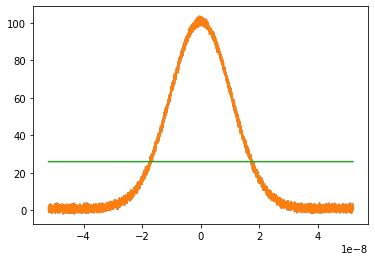

Pour laser à 4.05e-07 nm et R = 1.75e-06, V = 2.7061004529787
Pour laser à 4.05e-07 nm et R = 2.2e-06, V = 3.4019548551732237
Pour laser à 4.05e-07 nm et R = 1.8e-06, V = 2.7834176087780915
Pour laser à 5.15e-07 nm et R = 1.75e-06, V = 2.128098414478395
Pour laser à 5.15e-07 nm et R = 2.2e-06, V = 2.675323721058554
Pour laser à 5.15e-07 nm et R = 1.8e-06, V = 2.188901226320635
Pour laser à 5.32e-07 nm et R = 1.75e-06, V = 2.060095269654837
Pour laser à 5.32e-07 nm et R = 2.2e-06, V = 2.589834053280367
Pour laser à 5.32e-07 nm et R = 1.8e-06, V = 2.118955134502118
Pour laser à 6.328e-07 nm et R = 1.75e-06, V = 1.731938501037253
Pour laser à 6.328e-07 nm et R = 2.2e-06, V = 2.177294115589689
Pour laser à 6.328e-07 nm et R = 1.8e-06, V = 1.7814224582097458


-0.001000052

In [159]:
x_test=np.arange(-1e-2, 1e-2, 5.2e-6)
Test=gauss(x_test,1,100,0,2e-3)+(3)*(np.random.rand(len(x_test))-np.random.rand(len(x_test)))

V_th(x_test,Test)